# Object extraction methods

We compare here the results from three object extraction methods. In this notebook we only invstigate the positions of the objects detected in one CCD.

The methods are:

  1. imcore
  2. sextractor
  3. Python based method
  
The Python method detects peaks in the images and fits a PSF model, currently an elliptical gaussian, to each object.

In [1]:
from scipy.spatial import KDTree
import numpy as np
from astropy.io import fits
from astropy.table import Table
import extractor

import matplotlib.pyplot as plt
%matplotlib inline

## Read data 

The imcore and sextractor catalogues have been generated in advance. We generate here the Python catalogue.

In [2]:
# Imcore catalogue
cat = fits.open('simone_ccd_2_cat.fits')
imcore = Table(cat[1].data)

# Sextractor catalogue
cats = fits.open('simone_ccd_2_sex.fits')
sext = Table(cats[2].data)

# Python catalogue
fh = fits.open('simone_ccd_2.fits')
img = fh[1].data
this = extractor.extract(img)

## Offsets

For each comparison two histograms are given: the difference in pixels between the x and y positions for common detected sources.

In [3]:
def compute_offset(x1, y1, x2, y2):
    inc = np.array([x1, y1]).transpose()
    outc = np.array([x2, y2]).transpose()
    c = KDTree(inc)
    dist, idx = c.query(outc, 1)
    fig = plt.figure(figsize=(14,6))
    plt.subplot(1,2,1)
    plt.hist((inc[:,0][idx] - outc[:, 0]))
    plt.xlabel('dx')
    plt.ylabel('N')

    plt.subplot(1,2,2)
    plt.hist((inc[:,1][idx] - outc[:, 1]))
    plt.xlabel('dy')
    plt.ylabel('N')

### Offsets between Python method and imcore

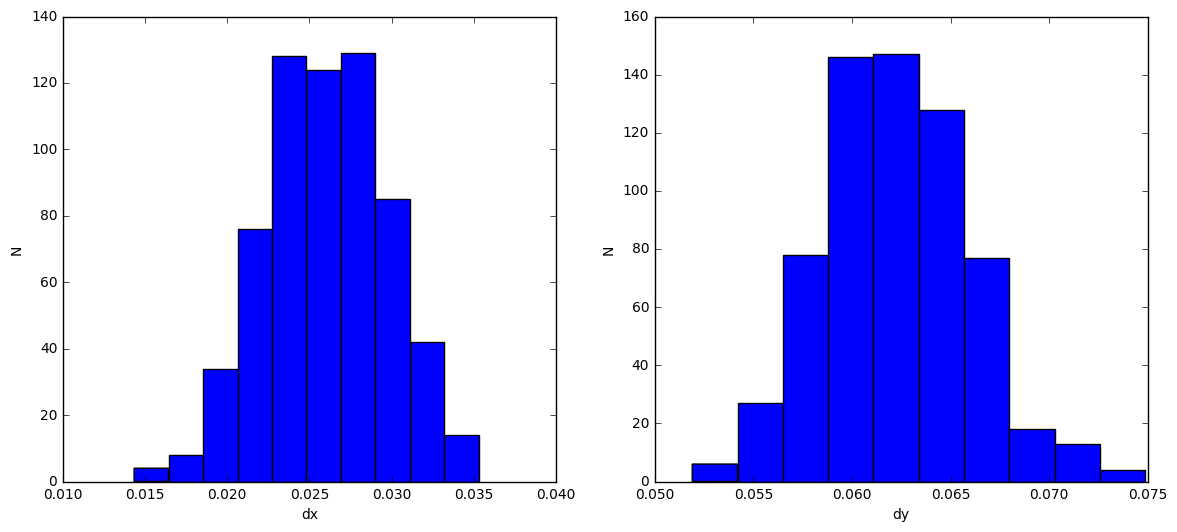

In [7]:
compute_offset(this['x'], this['y'], 
               imcore['X_coordinate'], imcore['Y_coordinate'])

### Offsets between Python method and sextractor

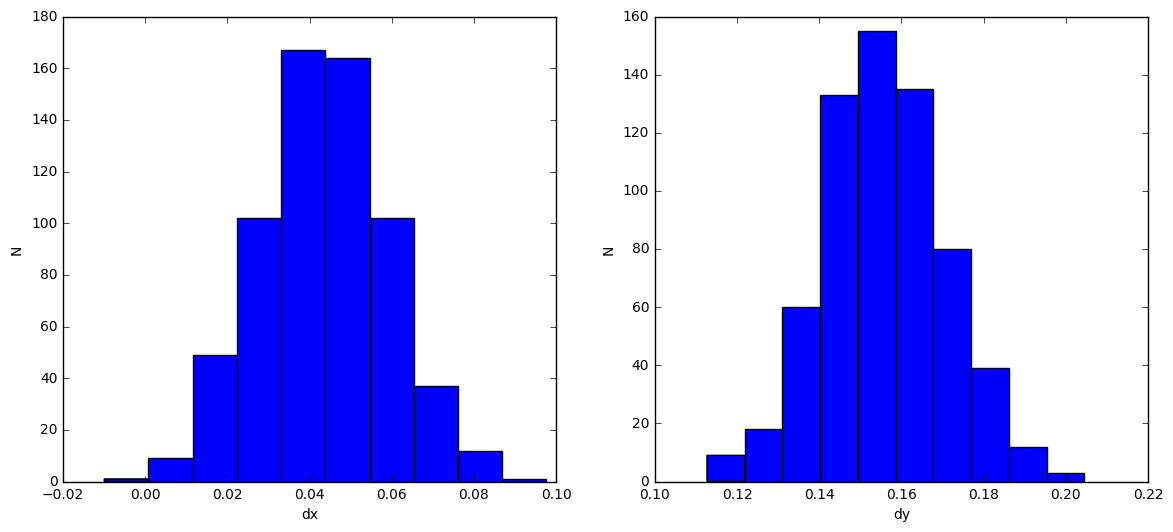

In [5]:
compute_offset(this['x'], this['y'], 
               sext['X_IMAGE'], sext['Y_IMAGE'])

### Offsets between imcore and sextractor

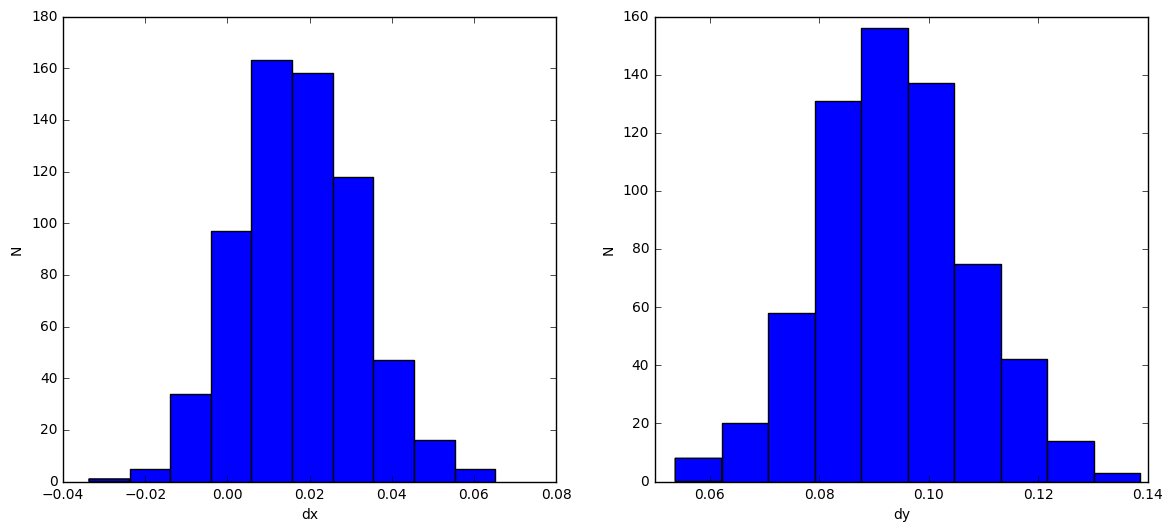

In [6]:
compute_offset(imcore['X_coordinate'], imcore['Y_coordinate'], 
               sext['X_IMAGE'], sext['Y_IMAGE'])